In [ ]:
!unzip /content/drive/MyDrive/images.zip

**Import Necessary Library**

In [42]:
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras version
import keras
print('keras: %s' % keras.__version__)

from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import Sequential
from numpy import array
from pickle import load
from matplotlib import pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense,Flatten
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam,SGD,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG19

tensorflow: 2.4.0
keras: 2.4.3


**Read Excel File and Create Data Frame**

In [37]:
import numpy as np
import pandas as pd
import re
df = pd.DataFrame(pd.read_excel('/content/drive/MyDrive/dataset 1.xlsx')).fillna(' ') 
df.head()

,Title,Description,Material,Pattern,Neckline,Image_Path
0,Peach Poly Crepe jumpsuit,This stylish foil print kurta from janasya is ...,Crepe,Printed,Round Neck,/images/pic_0.jpg
1,Light Brown Bias Yoke Checks Top,This check pattern top by Work Label is crafte...,Cotton,Checks,Round Neck,/images/pic_1.jpg
2,Off White Geometric Straight Cotton Dobby Top ...,"Featuring elegant printed details, this off wh...",Viscose,Checks,Round Neck,/images/pic_2.jpg
3,Blue Me Away Cape Top,Add an extra dose of style to your casual ward...,Polyester,Solid/Plain,V-Neck,/images/pic_3.jpg
4,Yellow On A High Gown,Yellow polyester georgette maxi dress. Polyest...,Polyester,Solid/Plain,V-Neck,/images/pic_4.jpg


In [38]:
data = list(df['Image_Path'])
label_Material = df["Material"]
label_Pattern = df["Pattern"]
label_Neckline = df["Neckline"]

**Load Image,reshape and save in list and convert it into numpy array**

In [ ]:
import cv2
train = []
for imagePath in data:
  image = cv2.imread("/content"+imagePath)
  image = cv2.resize(image, (224,224))
  image = img_to_array(image)
  train.append(image)
image = np.array(train)


In [49]:
print(image[0])


[[[199. 199. 199.]
  [199. 199. 199.]
  [199. 199. 199.]
  ...
  [193. 193. 193.]
  [192. 192. 192.]
  [192. 192. 192.]]

 [[199. 199. 199.]
  [200. 200. 200.]
  [201. 201. 201.]
  ...
  [194. 194. 194.]
  [193. 193. 193.]
  [193. 193. 193.]]

 [[199. 199. 199.]
  [200. 200. 200.]
  [199. 199. 199.]
  ...
  [193. 193. 193.]
  [194. 194. 194.]
  [195. 195. 195.]]

 ...

 [[190. 190. 190.]
  [190. 190. 190.]
  [191. 191. 191.]
  ...
  [173. 173. 173.]
  [174. 174. 174.]
  [174. 174. 174.]]

 [[190. 190. 190.]
  [190. 190. 190.]
  [190. 190. 190.]
  ...
  [178. 178. 178.]
  [179. 179. 179.]
  [179. 179. 179.]]

 [[190. 190. 190.]
  [189. 189. 189.]
  [189. 189. 189.]
  ...
  [182. 182. 182.]
  [181. 181. 181.]
  [182. 182. 182.]]]


**Find Class**

In [51]:
material = np.array(sorted(list(df.Material.unique())))
print(len(material))
label_Material = np.array(label_Material)
print(material)

pattern = np.array(sorted(list(df.Pattern.unique())))
print(len(pattern))
label_Pattern = np.array(label_Pattern)
print(pattern)

neck = np.array(sorted(list(df.Neckline.unique())))
print(len(neck))
label_Neckline = np.array(label_Neckline)
print(neck)

30
['Blended Fabric' 'Chiffon' 'Cotton' 'Crepe' 'Crinkled' 'Denim'
 'Georgette' 'Khadi' 'Knitted' 'Lace' 'Leather' 'Linen' 'Lyocell' 'Modal'
 'Net' 'Nylon' 'Organic' 'Organza' 'Polyamide' 'Polycotton' 'Polyester'
 'Poplin' 'Rayon' 'Satin' 'Sequin' 'Silk' 'Suede' 'Velvet' 'Viscose'
 'Wool']
18
['Animal Print' 'Checks' 'Detailing' 'Embellished/Sequined' 'Embroidered'
 'Floral' 'Geometric' 'Mirror Work' 'Ombre' 'Patterned' 'Plaid' 'Pleated'
 'Polka Dots' 'Printed' 'Ruffled' 'Solid/Plain' 'Stripes' 'Tie & Dye']
22
['Boat Neck' 'Cold Shoulder' 'Collar Neck' 'Cowl Neck' 'Crew Neck'
 'Halter Neck' 'High Neck' 'Hooded' 'Keyhole Neck' 'Mandarin Neck'
 'Off Shoulder' 'One Shoulder' 'Plunging Neck' 'Queen Anne' 'Round Neck'
 'Ruffled Neck' 'Scoop Neck' 'Shoulder Straps' 'Square Neck'
 'Strapless/Tube' 'Sweetheart' 'V-Neck']


****Image Preprocessing****

In [52]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
lable = LabelEncoder()
Label_Material = lable.fit_transform(label_Material)
y1 = to_categorical(Label_Material,num_classes=len(material))

lable = LabelEncoder()
Label_Pattern = lable.fit_transform(label_Pattern)
y2 = to_categorical(Label_Pattern,num_classes=len(pattern))


lable = LabelEncoder()
Label_Neckline = lable.fit_transform(label_Neckline)
y3 = to_categorical(Label_Neckline,num_classes=len(neck))


In [53]:
from sklearn.model_selection import train_test_split
X_train1, X_val1, y_train1, y_val1 = train_test_split(image, y1, test_size=0.20 )
X_train2, X_val2, y_train2, y_val2 = train_test_split(image, y2, test_size=0.20 )
X_train3, X_val3, y_train3, y_val3 = train_test_split(image, y3, test_size=0.20 )
print(X_train1.shape)
print(y_train1.shape)
print(X_val1.shape)
print(y_val1.shape)
print(X_train2.shape)
print(y_train2.shape)
print(X_val2.shape)
print(y_val2.shape)
print(X_train3.shape)
print(y_train3.shape)
print(X_val3.shape)
print(y_val3.shape)

(400, 224, 224, 3)
(400, 30)
(100, 224, 224, 3)
(100, 30)
(400, 224, 224, 3)
(400, 18)
(100, 224, 224, 3)
(100, 18)
(400, 224, 224, 3)
(400, 22)
(100, 224, 224, 3)
(100, 22)


In [54]:
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=30,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True,vertical_flip=True,height_shift_range=0.1,width_shift_range=0.1)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_set = train_datagen.flow(X_train1, y_train1, batch_size=32)
test_set = test_datagen.flow(X_val1,y_val1,batch_size=32)
train_set2 = train_datagen.flow(X_train2, y_train2, batch_size=32)
test_set2 = test_datagen.flow(X_val2,y_val2,batch_size=32)
train_set3 = train_datagen.flow(X_train3, y_train3, batch_size=32)
test_set3 = test_datagen.flow(X_val3,y_val3,batch_size=32)

**Define Model for Material**

In [55]:
model = Sequential()
model.add(VGG19(weights ='imagenet', pooling = 'avg', include_top=False,input_tensor=(Input(shape=(224,224,3)))))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30,activation = 'softmax'))
model.layers[0].trainable = False
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 30)                30750     
Total params: 20,580,446
Trainable params: 556,062
Non-trainable params: 20,024,384
_________________________________________________________________


In [57]:
history=model.fit(train_set,validation_data=test_set,epochs=125,verbose=2)

Epoch 1/125
13/13 - 6s - loss: 2.6352 - accuracy: 0.1775 - val_loss: 2.0822 - val_accuracy: 0.2800
Epoch 2/125
13/13 - 5s - loss: 2.3052 - accuracy: 0.2825 - val_loss: 2.1093 - val_accuracy: 0.3300
Epoch 3/125
13/13 - 5s - loss: 2.2941 - accuracy: 0.2875 - val_loss: 2.0714 - val_accuracy: 0.3900
Epoch 4/125
13/13 - 5s - loss: 2.2282 - accuracy: 0.3125 - val_loss: 2.0585 - val_accuracy: 0.3600
Epoch 5/125
13/13 - 5s - loss: 2.2238 - accuracy: 0.3025 - val_loss: 2.0645 - val_accuracy: 0.4000
Epoch 6/125
13/13 - 5s - loss: 2.1797 - accuracy: 0.3425 - val_loss: 2.0395 - val_accuracy: 0.3900
Epoch 7/125
13/13 - 5s - loss: 2.1727 - accuracy: 0.3425 - val_loss: 2.0574 - val_accuracy: 0.3400
Epoch 8/125
13/13 - 5s - loss: 2.1478 - accuracy: 0.3425 - val_loss: 2.0582 - val_accuracy: 0.4000
Epoch 9/125
13/13 - 5s - loss: 2.1513 - accuracy: 0.3525 - val_loss: 2.0398 - val_accuracy: 0.4000
Epoch 10/125
13/13 - 5s - loss: 2.0985 - accuracy: 0.3900 - val_loss: 2.0235 - val_accuracy: 0.4200
Epoch 11/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


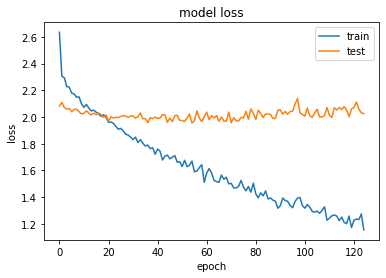

In [58]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper_left')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


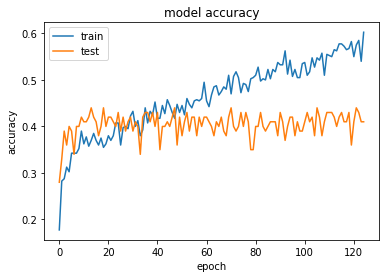

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper_left')
plt.show()

**Define Model for Pattern**

In [60]:
model2 = Sequential()
model2.add(VGG19(weights ='imagenet', pooling = 'avg', include_top=False,input_tensor=(Input(shape=(224,224,3)))))
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(18,activation = 'softmax'))
model2.layers[0].trainable = False
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
history2=model2.fit(train_set2,validation_data=test_set2,epochs=125,verbose=2)

Epoch 1/125
13/13 - 6s - loss: 2.3446 - accuracy: 0.3375 - val_loss: 1.8915 - val_accuracy: 0.4400
Epoch 2/125
13/13 - 5s - loss: 2.0683 - accuracy: 0.4050 - val_loss: 1.8814 - val_accuracy: 0.4500
Epoch 3/125
13/13 - 5s - loss: 1.8815 - accuracy: 0.4500 - val_loss: 1.7687 - val_accuracy: 0.4400
Epoch 4/125
13/13 - 5s - loss: 1.8407 - accuracy: 0.4725 - val_loss: 1.7016 - val_accuracy: 0.5000
Epoch 5/125
13/13 - 5s - loss: 1.7686 - accuracy: 0.4875 - val_loss: 1.7131 - val_accuracy: 0.4900
Epoch 6/125
13/13 - 5s - loss: 1.7478 - accuracy: 0.4950 - val_loss: 1.7217 - val_accuracy: 0.5100
Epoch 7/125
13/13 - 5s - loss: 1.7289 - accuracy: 0.4875 - val_loss: 1.6716 - val_accuracy: 0.4700
Epoch 8/125
13/13 - 5s - loss: 1.6601 - accuracy: 0.5125 - val_loss: 1.5811 - val_accuracy: 0.5600
Epoch 9/125
13/13 - 5s - loss: 1.6543 - accuracy: 0.5075 - val_loss: 1.5828 - val_accuracy: 0.4700
Epoch 10/125
13/13 - 5s - loss: 1.6128 - accuracy: 0.5175 - val_loss: 1.5720 - val_accuracy: 0.5000
Epoch 11/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


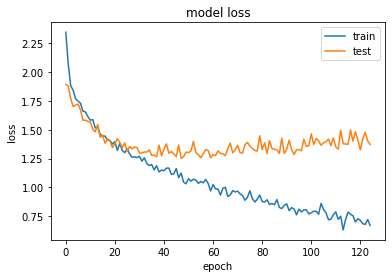

In [62]:
from matplotlib import pyplot as plt
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper_left')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


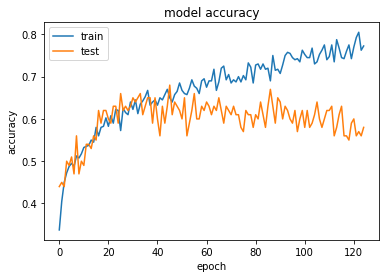

In [63]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper_left')
plt.show()

**Define Model for Neck**

In [64]:
model3 = Sequential()
model3.add(VGG19(weights ='imagenet', pooling = 'avg', include_top=False,input_tensor=(Input(shape=(224,224,3)))))
model3.add(Flatten())
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(22,activation = 'softmax'))
model3.layers[0].trainable = False
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
history3=model3.fit(train_set3,validation_data=test_set3,epochs=150,verbose=2)

Epoch 1/150
13/13 - 6s - loss: 2.7475 - accuracy: 0.1700 - val_loss: 2.4275 - val_accuracy: 0.2700
Epoch 2/150
13/13 - 5s - loss: 2.4987 - accuracy: 0.2100 - val_loss: 2.3771 - val_accuracy: 0.2500
Epoch 3/150
13/13 - 5s - loss: 2.4343 - accuracy: 0.2275 - val_loss: 2.3450 - val_accuracy: 0.2300
Epoch 4/150
13/13 - 5s - loss: 2.4325 - accuracy: 0.2350 - val_loss: 2.3517 - val_accuracy: 0.2500
Epoch 5/150
13/13 - 5s - loss: 2.4141 - accuracy: 0.2600 - val_loss: 2.3498 - val_accuracy: 0.2500
Epoch 6/150
13/13 - 5s - loss: 2.4161 - accuracy: 0.2475 - val_loss: 2.3666 - val_accuracy: 0.2400
Epoch 7/150
13/13 - 5s - loss: 2.3990 - accuracy: 0.2300 - val_loss: 2.3639 - val_accuracy: 0.2300
Epoch 8/150
13/13 - 5s - loss: 2.3734 - accuracy: 0.2650 - val_loss: 2.3580 - val_accuracy: 0.2700
Epoch 9/150
13/13 - 5s - loss: 2.3235 - accuracy: 0.2775 - val_loss: 2.3655 - val_accuracy: 0.2400
Epoch 10/150
13/13 - 5s - loss: 2.3452 - accuracy: 0.2575 - val_loss: 2.3534 - val_accuracy: 0.2900
Epoch 11/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


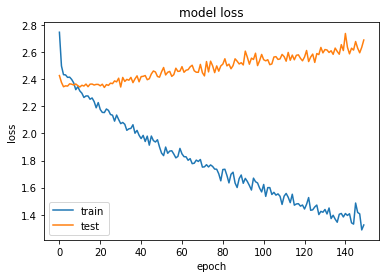

In [66]:
from matplotlib import pyplot as plt
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper_left')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


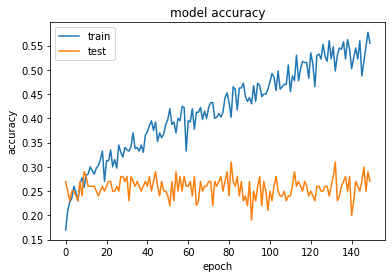

In [67]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper_left')
plt.show()

**Test on image downloaded from Internet**

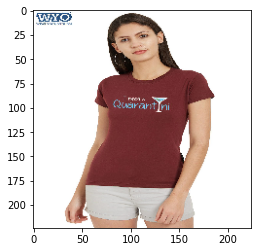

Material : Cotton 
Pattern : Printed 
Neck : Round Neck 


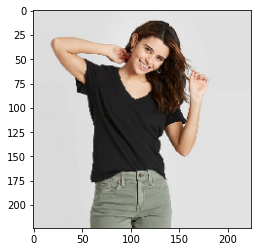

Material : Cotton 
Pattern : Printed 
Neck : Boat Neck 


In [75]:
def predict(img):
    Image_file = '/content/' + img
    image = load_img(Image_file, target_size=(224,224))
    plt.imshow(image)
    plt.show()
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)

    pred1= model.predict(image)
    pred2= model2.predict(image)
    pred3= model3.predict(image)


    pred_mat = np.argmax(pred1)
    y1pred = material[pred_mat]

    pred_pat = np.argmax(pred2)
    y2pred = pattern[pred_pat]

    pred_neck = np.argmax(pred3)
    y3pred = neck[pred_neck]

    print(f'Material : {y1pred} ')
    print(f'Pattern : {y2pred} ')
    print(f'Neck : {y3pred} ')

predict('test.jpg')
predict('test5.jfif')